In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])

  Activating project at `~/Documents/programming/BME-502-2025`
   Resolving package versions...
   Installed Polynomials ─ v4.0.17
    Updating `~/Documents/programming/BME-502-2025/Project.toml`
  [f27b6e38] + Polynomials v4.0.17
  [10745b16] + Statistics v1.11.1
    Updating `~/Documents/programming/BME-502-2025/Manifest.toml`
  [f27b6e38] + Polynomials v4.0.17
Precompiling project...
   7944.2 ms  ✓ Polynomials
   1019.2 ms  ✓ Polynomials → PolynomialsChainRulesCoreExt
  2 dependencies successfully precompiled in 10 seconds. 356 already precompiled.


In [2]:
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

This chapter is on the concept of least-square fitting of data.  The assumption that we are making here is that each data point that we are measuring is independent of each other and that each data point $y_{i}=f(x_{i},\theta)$ has an error that has been drawn from a normal distribution with zero mean and standard deviation $\sigma_{i}$. $\theta$ represents the parameters of the model $f(x,\theta)$ with which you want to fit the data.
Lets find out what we can say about the likelihood pdf of such data:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \prod_{i}\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{(y_{i}(x_{i})-f(x_{i},\theta))^2}{2\sigma_{i}^2}\big)$$
Least-square fits are often also called $\chi^2$ fits.  $\chi^2$ is defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$
which simplifies the likelihood to:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$
now let's assume also that the prior distribution for your parameters is flat $P(\theta)=const$.  Then
$$P(\theta \mid \{y_{i}(x_{i})\}) \propto P (\{y_{i}(x_{i})\}\mid \theta)$$
and if you are only interested in the maximum value of the $P(\theta \mid \{y_{i}(x_{i})\})$ then you need to find the minimum value of $\chi^2$.  That is what people mean when they talk about least-square fitting: minimizing $\chi^2$ as a function of $\theta$.

In [3]:
x = 0:10

0:10

In [4]:
collect(x)

11-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [5]:
dataerr = 3.0
d = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=3.0)

In [6]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))

11-element Vector{Float64}:
  7.459005661156507
  2.109052232884924
  6.060894715361554
  9.170665912122844
 20.081374951823925
 16.041221577647754
 18.860561041274686
 21.945563445648798
 20.052403080904675
 26.684707505479885
 31.872671853980325

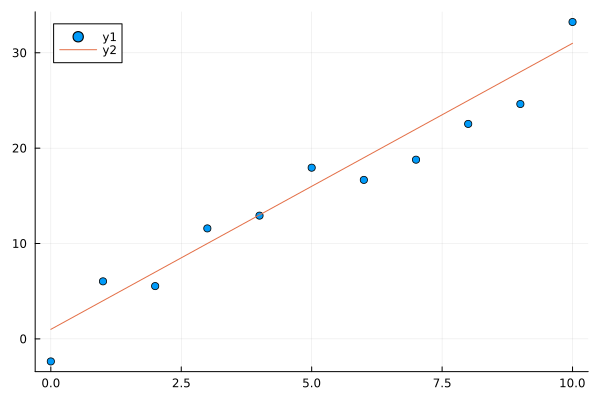

In [7]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
scatter(x,y)
plot!(x,y_true)

In [8]:
Polynomial([1,-1,3])

Polynomial(1 - x + 3*x^2)

In [9]:
line_fit = fit(x,y,1)

Polynomial(0.6148328881000316 + 2.9229163038609123*x)

In [10]:
typeof(line_fit)

Polynomial{Float64, :x} (alias for Polynomials.MutableDensePolynomial{Polynomials.StandardBasis, Float64, :x})

In [11]:
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 0.6148328881000316
 2.9229163038609123

In [12]:
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x

0.6148328881000316:2.9229163038609123:29.843995926709155

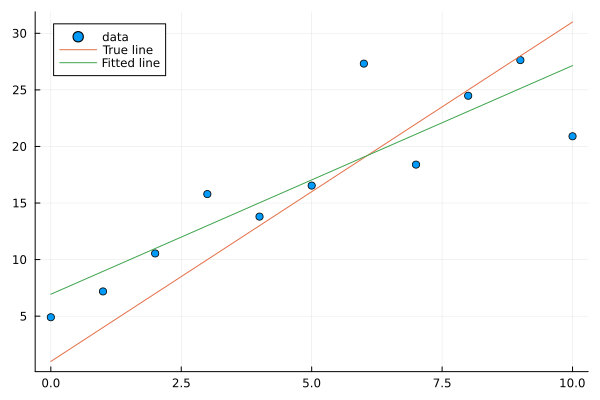

In [13]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
line_fit = fit(x,y,1)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x
scatter(x,y, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted,label="Fitted line")

# Overfitting

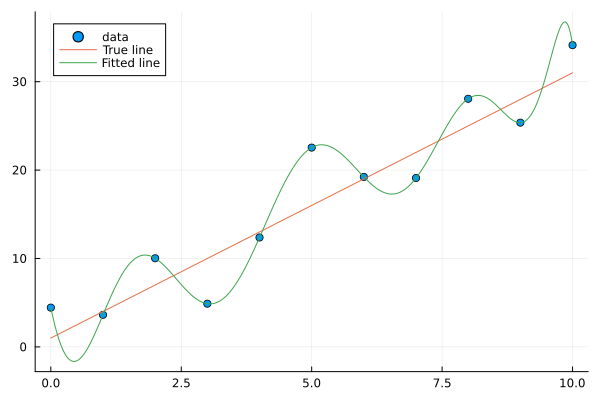

In [14]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
poly_fit = fit(x,y,11)
x_fit = 0:0.001:10
y_fitted = poly_fit.(x_fit)
scatter(x,y, label="data")
plot!(x,y_true, label="True line")
plot!(x_fit,y_fitted,label="Fitted line")

# Prediction of overfitted models is bad

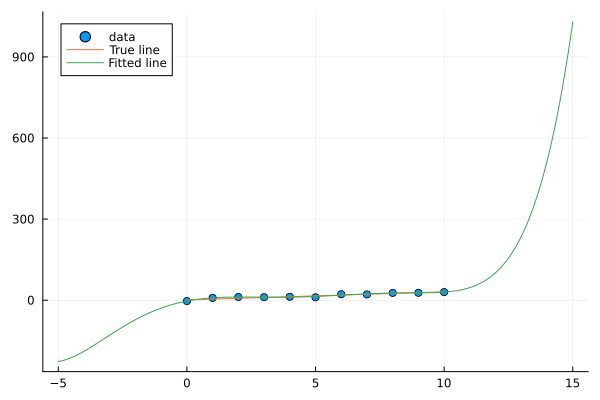

In [15]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
poly_fit = fit(x,y,6)
x_fit = -5:0.001:15
y_fitted = poly_fit.(x_fit)
scatter(x,y, label="data")
plot!(x,y_true, label="True line")
plot!(x_fit,y_fitted,label="Fitted line")

In [16]:
function chisqr(datax,datay,fitfct)
    return sum((datay .- fitfct.(datax)).^2)
end

chisqr (generic function with 1 method)

In [17]:
chisqr(x,y,line_fit)

189.66433947485396